In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from multipolar import de_groot_models

import numpy as np
from matplotlib import colors
import seaborn as sns

# 1. Create a network

In [2]:
## Create random graph with 3 modules
G = nx.planted_partition_graph(
    l=4,
    k=100,
    p_in=0.03,
    p_out=0.001,
    seed=0 ## To fix output. Change to generate different random graphs.
    )
## Use connected component
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

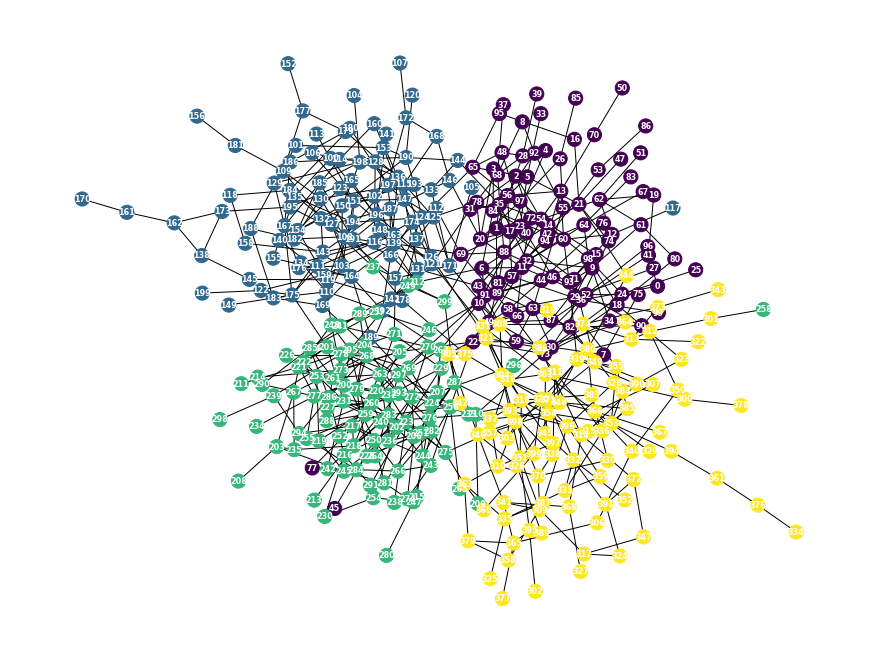

In [3]:
## Plot graph
nodelist = list(G)
node_colors = [G.nodes[n]["block"] for n in nodelist]

plt.figure(figsize=(8*1.5,6*1.5))
nx.draw(G, 
        pos=nx.kamada_kawai_layout(G),
        node_size=200,
        node_color=node_colors,
        cmap="viridis",
        with_labels=True,
        font_color="w",
        font_weight="bold",
        font_size=8)

# 2. Create a tripolar elite with poles A, B, C, D

In [4]:
## Assign some nodes to the elite
elite = {
    "A":[136,197],
    "B":[54,55,72],
    "C": [201,223],
    "D": [332]
}
## Assign numerical labels to the opinion poles
poles_corresp = {
    "A":0,
    "B":1,
    "C":2,
    "D":3
}
## Build dictionary of coordinates for elite nodes and list of elite nodes
elite_dct, elite_nodes, poles_coord = de_groot_models.assign_poles_to_nodes(poles_corresp,elite)
## Show dictionary with coordinates of elite nodes
## These coordinates are obtained using de_groot_models.get_simplex_vertex(D) with D
## the number of dimensions, which for a system with n poles is n-1 (for n=3, we have D=2 dimensions).
elite_dct,elite_nodes,poles_coord

({136: array([1., 0., 0.]),
  197: array([1., 0., 0.]),
  54: array([-0.33333333,  0.94280904,  0.        ]),
  55: array([-0.33333333,  0.94280904,  0.        ]),
  72: array([-0.33333333,  0.94280904,  0.        ]),
  201: array([-0.33333333, -0.47140452,  0.81649658]),
  223: array([-0.33333333, -0.47140452,  0.81649658]),
  332: array([-0.33333333, -0.47140452, -0.81649658])},
 [136, 197, 54, 55, 72, 201, 223, 332],
 {'A': array([1., 0., 0.]),
  'B': array([-0.33333333,  0.94280904,  0.        ]),
  'C': array([-0.33333333, -0.47140452,  0.81649658]),
  'D': array([-0.33333333, -0.47140452, -0.81649658])})

# 3. Compute the elite-connected subgraph

In [5]:
G_econ = de_groot_models.get_elite_connected(G, elite_nodes, max_path_len=10)
## Show size of elite-connected network and of the original network (for an undirected network they must be the same)
G_econ.order(), G.order()

calculando las conexiones...
0 40
1 148
2 295
3 365
4 381
5 387
6 389
7 390
8 390
9 390


(390, 390)

# 4. Compute opinions of listeners

In [6]:
## Fix ordering of the nodes so that we know to which node does each opinion correspond
nodes_order= list(G_econ)
order_dict= dict([ (v,i) for i,v in enumerate(nodes_order) ])
## Compute opinions using the modified DeGroot model with stubborn elite nodes (Friedkin-Johnsen model)
degroot = de_groot_models.solve_model_Ax_iterative(
                G_econ,
                elite_dct,
                nodes_order = nodes_order,
                order_dict = order_dict,
                tol = 1e-3
            )

Building adjacency matrix...
Initializing the model...
Solving polarization model with the iterative Ax method
0 inf
1 16.628378259253918
2 10.583328239175907
3 9.538180280267436
4 8.501526792694156
5 7.79733996573005
6 7.030187553483353
7 6.557910117347847
8 5.982682634458151
9 5.613098501285516
10 5.161898946887528
11 4.859563536946947
12 4.498507244518523
13 4.243681826991629
14 3.9485074890618783
15 3.7285794209338077
16 3.4847401275736805
17 3.2900705304606506
18 3.0867489748946615
19 2.9145153066369685
20 2.7433944859864834
21 2.592259546385047
22 2.4449169529224655
23 2.3109587643349188
24 2.1835952325683996
25 2.065434767888263
26 1.9546153401247843
27 1.8506701940786423
28 1.7536874674893395
29 1.6621693248387375
30 1.5775000674817246
31 1.497081021983302
32 1.4229694837557454
33 1.3529252635231337
34 1.2885936053983416
35 1.2271654337434605
36 1.1710101882651052
37 1.1175760395492236
38 1.069278532078071
39 1.0235111045986964
40 0.982658235650453
41 0.9440559461433824
42 0.90

The coordinates of the nodes in the opinion space are stored in the array "degroot". You can now make any computations you'd like with them.

# 6. Visuzalizations

## 6.1 Visualize 2D projections of the opinion distribution (a tripolar example is already 2D, so there is nothing to project, we are visualizing the opinion space itself)

There are several highly customizable visualization functions in polarization_visualization_tools. Here I'm showing just a couple of the most useful.

In [30]:
from multipolar import polarization_visualization_tools
import importlib
importlib.reload(polarization_visualization_tools)

<module 'multipolar.polarization_visualization_tools' from 'C:\\Users\\csh_samu\\Documents\\TESIS\\papers_multipolo\\paper_principal\\GITHUB_package\\multipolar\\polarization_visualization_tools.py'>

Computing global polarization compass...
Explained variance:  [0.20426394 0.37415965 0.42157641]
Plotting points...
Projecting 2D points to the sides of triangle...
Plotting 1D kde...
Plotting 1D histogram...
Plotting 2D kde...
Computing 2D kernel...
Masking points outside triangle...
19963
Plotting contours...
Plotting 2D contours...
Computing 2D kernel...
Masking points outside triangle...
19963
Plotting contours...
Plotting polarization compass...
Plotting points...
Projecting 2D points to the sides of triangle...
Plotting 1D kde...
Plotting 1D histogram...
Plotting 2D kde...
Computing 2D kernel...
Masking points outside triangle...
19963
Plotting contours...
Plotting 2D contours...
Computing 2D kernel...
Masking points outside triangle...
19963
Plotting contours...
Plotting polarization compass...
Plotting points...
Projecting 2D points to the sides of triangle...
Plotting 1D kde...
Plotting 1D histogram...
Plotting 2D kde...
Computing 2D kernel...
Masking points outside triangle..

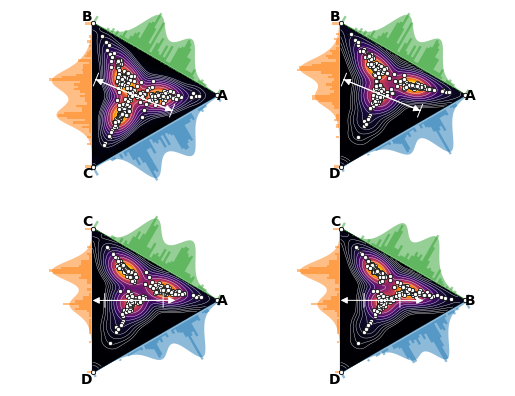

In [17]:
## These functions return figure objects, so I write _=... to avoid duplicated plots in jupyter
_=polarization_visualization_tools.vis_2d_projections(
    degroot,
    proj_type = "orthogonal",
    show_points = True,
    show_2d_kde = True,
    show_2d_hist = False,
    show_1d_kde = True,
    show_global_pca = True,
    project_close_only = True,
    show_2d_contours=True,
    poles_lbls=["A","B","C","D"],
    cntr_levels=10
)

Computing global polarization compass...
Explained variance:  [0.20426394 0.37415965 0.42157641]
Projecting 2D points to the sides of triangle...
Plotting 1D histogram...
Plotting 2D histogram...
Plotting polarization compass...
Projecting 2D points to the sides of triangle...
Plotting 1D histogram...
Plotting 2D histogram...
Plotting polarization compass...
Projecting 2D points to the sides of triangle...
Plotting 1D histogram...
Plotting 2D histogram...
Plotting polarization compass...
Projecting 2D points to the sides of triangle...
Plotting 1D histogram...
Plotting 2D histogram...
Plotting polarization compass...


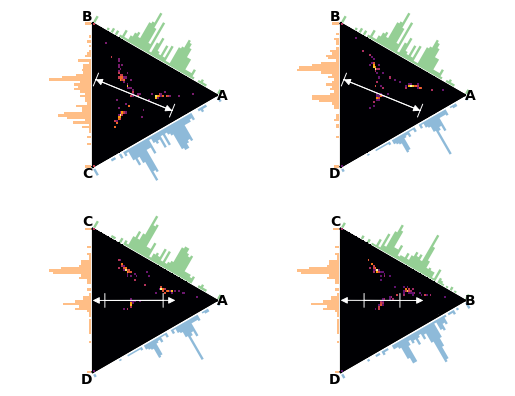

In [26]:
## Another (uglier but faster) version with a 2D histogram instead of 2D KDE
_=polarization_visualization_tools.vis_2d_projections(
    degroot,
    proj_type = "orthogonal",
    show_points = False,
    show_2d_kde = False,
    show_2d_hist = True,
    hist2d_bins = 70,
    show_1d_kde = False,
    show_global_pca = True,
    show_proj_pca = False,
    project_close_only = True,
    show_2d_contours=False,
    poles_lbls=["A","B","C","D"]
)

## 6.2 Adversarial projections: 1D projections along lines whose endpoints are either single poles or the barycenter of several poles (see section 5.1.3 of https://drive.upm.es/index.php/s/HHQSlJdVSyrtNBj). The directions better aligned with the principal components are marked with the % of the variance explained by the corresponding PC and their degree of alignment.

25
PCA explained variance:  [0.20426394 0.37415965 0.42157641]
1 vs 1
[0] [1]
[0] [2]
[0] [3]
[1] [2]
[1] [3]


C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

[2] [3]
1 vs 2
[0] [1, 2]
[1] [0, 2]
[2] [0, 1]
[0] [1, 3]


C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

[1] [0, 3]
[3] [0, 1]
[0] [2, 3]
[2] [0, 3]
[3] [0, 2]


C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

[1] [2, 3]
[2] [1, 3]
[3] [1, 2]
1 vs 3
[0] [1, 2, 3]
[1] [0, 2, 3]


C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

[2] [0, 1, 3]
[3] [0, 1, 2]
2 vs 2
[0, 1] [2, 3]
[0, 2] [1, 3]
[0, 3] [1, 2]


C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

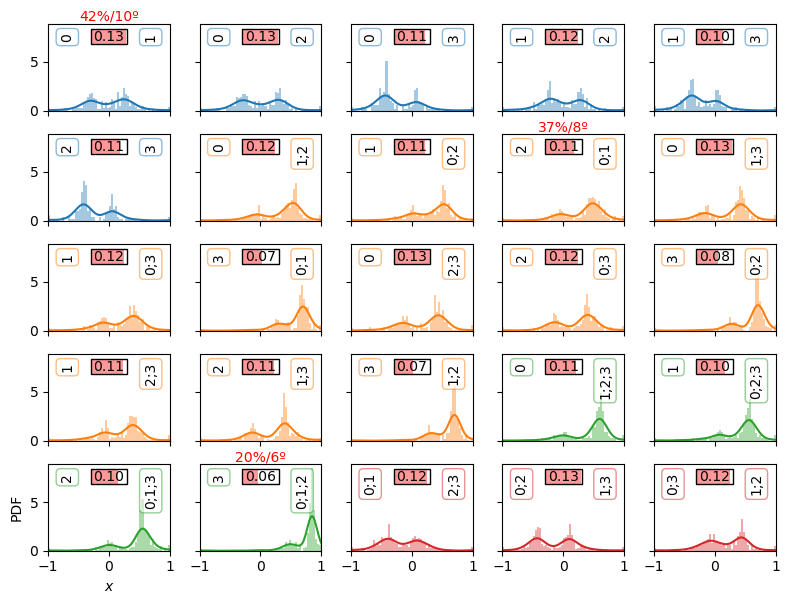

In [28]:
_= polarization_visualization_tools.vis_all_AvB_projs(
        degroot,
        project_close_only=True,
        show_hist=True,
        proj_type = "orthogonal")

## 6.3 PCA projections

Computing 2D kernel...


C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


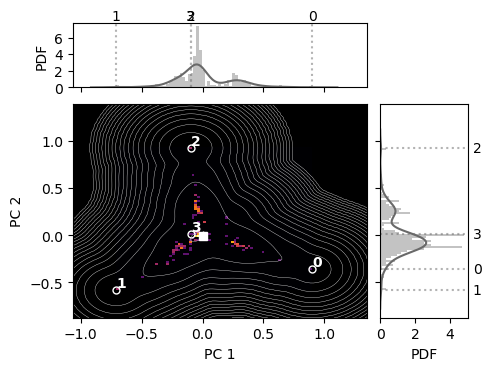

In [33]:
_=polarization_visualization_tools.vis_2d_pca(
    degroot,
    pca_to_plot = [0,1], ## Which PCA should be plotted
    dir_signs = [1,1], ## To change direction of axis if needed
    hist2d_bins = 70,
    grid_div = 100,
    nlevels = 20,
    pole_lbls = None,
    xlim = None,
    ylim = None
)

Computing 2D kernel...


C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


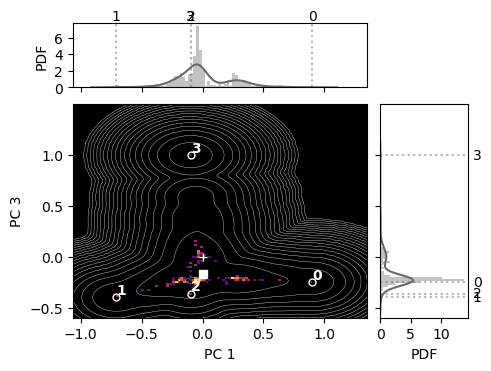

In [34]:
_=polarization_visualization_tools.vis_2d_pca(
    degroot,
    pca_to_plot = [0,2], ## Which PCA should be plotted
    dir_signs = [1,1], ## To change direction of axis if needed
    hist2d_bins = 70,
    grid_div = 100,
    nlevels = 20,
    pole_lbls = None,
    xlim = None,
    ylim = None
)

Computing 2D kernel...


C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


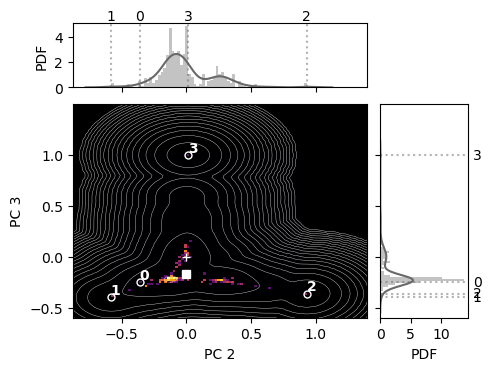

In [35]:
_=polarization_visualization_tools.vis_2d_pca(
    degroot,
    pca_to_plot = [1,2], ## Which PCA should be plotted
    dir_signs = [1,1], ## To change direction of axis if needed
    hist2d_bins = 70,
    grid_div = 100,
    nlevels = 20,
    pole_lbls = None,
    xlim = None,
    ylim = None
)

# 6.4 Dirty 3D representation

In [52]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from matplotlib.text import Annotation

class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)

    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)

        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)

setattr(Axes3D,'arrow3D',_arrow3D)

class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)
def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D,'annotate3D',_annotate3D)

In [53]:
def plot_tetrahedron(
    ax=None, 
    pole_lbls = [0,1,2,3],
    lbls_out = False,
    empty=False):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    ax.set_axis_off()
    if empty:
        for i in range(4):
            x = vs[i,0]
            y = vs[i,1]
            z = vs[i,2]
            for j in range(i+1,4):
                x = vs[[i,j],0]
                y = vs[[i,j],1]
                z = vs[[i,j],2]
                plt.plot(x,y,z,'k',lw=1.0,zorder=0,alpha=0.0)
        return ax
    if lbls_out:
        for i in range(4):
            x = vs[i,0]
            y = vs[i,1]
            z = vs[i,2]
            for j in range(i+1,4):
                x = vs[[i,j],0]
                y = vs[[i,j],1]
                z = vs[[i,j],2]
                plt.plot(x,y,z,'k',lw=1.0,zorder=0)
        i=0
        x = vs[i,0]
        y = vs[i,1]
        z = vs[i,2]
        ax.annotate3D(pole_lbls[i],(x,y,z),
                      ha="left",
                      va="center",
                      color="k",
                      fontweight="bold",
                      fontsize=14,
                      textcoords='offset points',
                      zorder=20)
        i=1
        x = vs[i,0]
        y = vs[i,1]
        z = vs[i,2]
        ax.annotate3D(pole_lbls[i],(x,y,z),
                      ha="right",
                      va="center",
                      color="k",
                      fontweight="bold",
                      fontsize=14,
                      textcoords='offset points',
                      zorder=20)
        i=2
        x = vs[i,0]
        y = vs[i,1]
        z = vs[i,2]
        ax.annotate3D(pole_lbls[i],(x,y,z),
                      ha="left",
                      va="bottom",
                      color="k",
                      fontweight="bold",
                      fontsize=14,
                      textcoords='offset points',
                      zorder=20)
        i=3
        x = vs[i,0]
        y = vs[i,1]
        z = vs[i,2]
        ax.annotate3D(pole_lbls[i],(x,y,z),
                      ha="left",
                      va="top",
                      color="k",
                      fontweight="bold",
                      fontsize=14,
                      textcoords='offset points',
                      zorder=20)
    else:
        for i in range(4):
            x = vs[i,0]
            y = vs[i,1]
            z = vs[i,2]
            plt.plot([x],[y],[z],'ow',ms=15,alpha=1,zorder=20)
            ax.annotate3D(pole_lbls[i],(x,y,z),
                      ha="center",
                      va="center",
                      color="k",
                      fontweight="bold",
                      fontsize=14,
                      textcoords='offset points',
                      zorder=20)
            for j in range(4):
                x = vs[[i,j],0]
                y = vs[[i,j],1]
                z = vs[[i,j],2]
                plt.plot(x,y,z,'k',lw=1.0,zorder=0)
    return ax
def plot_PCA_and_CM(
    ax,
    data,
    clr_dct = {0:"C2",1:"C1",2:"C0"},
    pca_esc=1.8,
    show_cm_lines=True,
    show_cm=True):
    plt.sca(ax)
    ## Compute PCA
    l, var_exp, U = polarization_visualization_tools.my_pca(data)
    ## Plot PCA
    for i in range(3):
        clr = clr_dct[i]
        ux,uy,uz = U[:,i]*var_exp[i]*pca_esc
        ax.arrow3D(-.5*ux,-.5*uy,-.5*uz,
                   ux,uy,uz,
                   zorder=20,
                   mutation_scale=10,
                        arrowstyle='<|-|>',
                        shrinkA=0, shrinkB=0,
                        color=clr,
                        lw=1)
    ## Plot center of mass
    cm = np.mean(degroot,axis=0)
    if show_cm_lines:
        plot_cm_with_lines_3d(ax,cm)
    else:
        if show_cm:
            ax.plot([cm[0]],[cm[1]],[cm[2]],"sr",zorder=19)
    return ax
def plot_cm_with_lines_3d(ax,cm):
    poles_coord_3d = polarization_visualization_tools.get_simplex_vertex(3)
    for pl in poles_coord_3d:
        ax.plot([pl[0],cm[0]],[pl[1],cm[1]],[pl[2],cm[2]],"--r",lw=1)
    ax.plot([cm[0]],[cm[1]],[cm[2]],"sr",zorder=19)
    return ax
def plot_PCA(ax,vecs):
    vecs = np.array(vecs)
    for i,vec in enumerate(vecs[:,::-1]):
        ux,uy,uz = vec
        ax.arrow3D(-.5*ux,-.5*uy,-.5*uz,
                   ux,uy,uz,
                   zorder=20,
                   mutation_scale=10,
                        arrowstyle='<|-|>',
                        shrinkA=0, shrinkB=0,
                        color="C%d"%i,
                        lw=1)
    return ax
def set_3D_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

C:\Users\csh_samu\AppData\Local\Temp/ipykernel_21036/807610564.py:30: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  super().__init__(text, xy=(0,0), *args, **kwargs)
C:\Users\csh_samu\AppData\Local\Temp/ipykernel_21036/807610564.py:34: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
C:\Users\csh_samu\AppData\Local\Temp/ipykernel_21036/807610564.py:17: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)


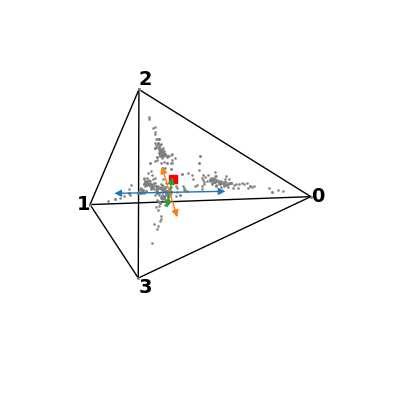

In [54]:
# elev = -119
# azim = -8

azim=-106
elev=-6

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=elev, azim=azim)
ax.set_axis_off()

plot_tetrahedron(
    ax=ax,
    lbls_out=True,
    empty=False
)

plot_PCA_and_CM(ax,degroot,show_cm_lines=False)
set_3D_axes_equal(ax)
plt.plot(degroot[:,0],degroot[:,1],degroot[:,2],"o",color="0.5",alpha=0.8,ms=1)

plt.show()